In [1]:
import os, sys
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
from analysis.FultonMarketAnalysis import FultonMarketAnalysis

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.

********* JAX NOT FOUND *********
 PyMBAR can run faster with JAX  
 But will work fine without it   
Either install with pip or conda:
      pip install pybar[jax]     
               OR                
      conda install pymbar       
*********************************


In [2]:
dir = '/home/dcooper/projects/JustDoIt/umbrella_sampling/centroid_1_6//'
pdb1 = '/home/dcooper/projects/JustDoIt/centroids/centroid_1.pdb'
sys_fn = '/home/dcooper/projects/JustDoIt/centroids/centroid_1_sys.xml'
pdb2 = '/home/dcooper/projects/JustDoIt/centroids/centroid_6.pdb'

In [3]:
analysis = FultonMarketAnalysis(dir, pdb1)

10/16/2024 12:43:26 // Found storage directory at /home/dcooper/projects/JustDoIt/umbrella_sampling/centroid_1_6/saved_variables
10/16/2024 12:43:27 // Shapes of temperature arrays: [(0, (10,)), (1, (11,)), (2, (11,)), (3, (11,)), (4, (11,)), (5, (12,)), (6, (13,)), (7, (14,)), (8, (14,)), (9, (15,)), (10, (16,))]
10/16/2024 12:43:27 // Detected interpolations at: [[2, 4, 6, 8, 10, 14], [2, 4, 6, 8, 10], [2, 4, 6, 8, 10], [2, 4, 6, 8, 10], [2, 4, 6, 8, 10], [2, 4, 6, 10], [2, 4, 6], [2, 6], [2, 6], [6], []]
10/16/2024 12:43:27 // Shape of final energies determined to be: (33, 16, 16)


In [4]:
traj1 = analysis.state_trajectory(0, stride=10)
traj2 = analysis.state_trajectory(-1, stride=10)
traj1p = md.load_pdb(pdb1)
traj2p = md.load_pdb(pdb2)
intracellular_inds = [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349]
intracellular_inds = [ind - 67 for ind in intracellular_inds]
prot_sel = traj1.topology.select('protein and name CA')
sel = traj1.topology.select(f'resid {" ".join([str(i) for i in intracellular_inds])}')

In [5]:
RMSD1_1p = md.rmsd(traj1, traj1p, frame=0, atom_indices=sel, ref_atom_indices=sel)*10
RMSD1_2p = md.rmsd(traj1, traj2p, frame=0, atom_indices=sel, ref_atom_indices=sel)*10
RMSD2_1p = md.rmsd(traj2, traj1p, frame=0, atom_indices=sel, ref_atom_indices=sel)*10
RMSD2_2p = md.rmsd(traj2, traj2p, frame=0, atom_indices=sel, ref_atom_indices=sel)*10

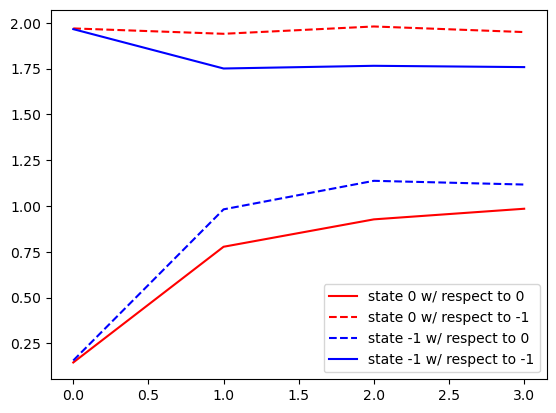

In [6]:
plt.plot(range(traj1.n_frames), RMSD1_1p, 'r', label='state 0 w/ respect to 0')
plt.plot(range(traj1.n_frames), RMSD1_2p, 'r', label='state 0 w/ respect to -1', linestyle='dashed')
plt.plot(range(traj1.n_frames), RMSD2_1p, 'b', label='state -1 w/ respect to 0', linestyle='dashed')
plt.plot(range(traj1.n_frames), RMSD2_2p, 'b', label='state -1 w/ respect to -1')

plt.legend()
plt.show()

In [ ]:
RMSF1 = md.rmsf(traj1, traj1, atom_indices=prot_sel, ref_atom_indices=prot_sel)*10
RMSF2 = md.rmsf(traj2, traj2, atom_indices=prot_sel, ref_atom_indices=prot_sel)*10

colors = []
for resid in range(len(RMSF1)):
    if resid in intracellular_inds:
        colors.append('red')
    else:
        colors.append('blue')

plt.bar(range(len(RMSF1)), RMSF1, color=colors)
plt.show()
plt.bar(range(len(RMSF1)), RMSF2, color=colors)
plt.show()

In [ ]:
# Restraints
selection_string = 'protein and ('
intracellular_inds = [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349]
intracellular_inds = [ind - 67 for ind in intracellular_inds]
print(intracellular_inds)
for ind in intracellular_inds:
    selection_string += f'(resid {ind}) or '
selection_string = selection_string[:-4] + ')'

sele = traj1.topology.select(selection_string)

In [ ]:
from openmm.app import PDBFile
from openmm import *

pdbfile = PDBFile(pdb1)
top = pdbfile.topology
with open(sys_fn, 'r') as f:
    system = XmlSerializer.deserialize(f.read())



In [ ]:
def _restrain_atoms_by_dsl(topology, atoms_dsl, spring_constant, spring_center):
    """
    Unceremoniously Ripped from the OpenMMTools github, simply to change sigma to K
    Apply a soft harmonic restraint to the given atoms.
    This modifies the ``ThermodynamicState`` object.
    Parameters
    ----------
    thermodynamic_state : openmmtools.states.ThermodynamicState
        The thermodynamic state with the system. This will be modified.
    topology : mdtraj.Topology or openmm.Topology
        The topology of the system.
    atoms_dsl : str
       The MDTraj DSL string for selecting the atoms to restrain.
    spring_constant : openmm.unit.Quantity, optional
        Controls the strength of the restrain. The smaller, the tighter
        (units of distance, default is 3.0*angstrom).
    """

    # Make sure the topology is an MDTraj topology.
    if isinstance(topology, md.Topology):
        mdtraj_topology = topology
    else:
        mdtraj_topology = md.Topology.from_openmm(topology)
    
    #Determine indices of the atoms to restrain
    restrained_atom_indices = mdtraj_topology.select(atoms_dsl)
    if len(restrained_atom_indices) == 0:
        raise Exception('No Atoms To Restrain!')
    
    #Assign Spring Constant, ensuring it is the appropriate unit
    K = spring_constant  # Spring constant.
    if type(K) != unit.Quantity:
        K = K * spring_constant_unit
    elif K.unit != spring_constant_unit:
        raise Exception('Improper Spring Constant Unit')
    
    #Energy and Force for Restraint
    energy_expression = '(K/2)*periodicdistance(x, y, z, x0, y0, z0)^2'
    restraint_force = openmm.CustomExternalForce(energy_expression)
    restraint_force.addGlobalParameter('K', K)
    restraint_force.addPerParticleParameter('x0')
    restraint_force.addPerParticleParameter('y0')
    restraint_force.addPerParticleParameter('z0')
    for index in restrained_atom_indices:
        parameters = spring_center[index,:]
        restraint_force.addParticle(index, parameters)
    system.addForce(restraint_force)

    return system

system = _restrain_atoms_by_dsl(top, selection_string, spring_constant=83*unit, spring_center=traj1p.xyz)